# Load the results

In [1]:
import os
import pickle

with open(os.path.join('..', 'mnist_fmnist_sweep_error_rate_clean_OVERFITTING_TRIAL', 'results_0.pickle'), 'rb') as F:
    mnist_baseline_results = {0: pickle.load(F)}
with open(os.path.join('..', 'mnist_fmnist_sweep_error_rate_clean_OVERFITTING_TRIAL', 'results_1.pickle'), 'rb') as F:
    fmnist_baseline_results = {0: pickle.load(F)}

mnist_naive_results  = {}
fmnist_naive_results = {}
mnist_ltrwe_results  = {}
fmnist_ltrwe_results = {}
mnist_sss_results    = {}
fmnist_sss_results   = {}

error_rates = [0.0, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
for (idx, error_rate) in zip(range(0, len(error_rates)), error_rates):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        mnist_naive_results.update({error_rate: pickle.load(F)})
for (idx, error_rate) in zip(range(len(error_rates), 2*len(error_rates)), error_rates):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        fmnist_naive_results.update({error_rate: pickle.load(F)})
for (idx, error_rate) in zip(range(2*len(error_rates), 3*len(error_rates)), error_rates):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        mnist_ltrwe_results.update({error_rate: pickle.load(F)})
for (idx, error_rate) in zip(range(3*len(error_rates), 4*len(error_rates)), error_rates):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        fmnist_ltrwe_results.update({error_rate: pickle.load(F)})
for (idx, error_rate) in zip(range(4*len(error_rates), 5*len(error_rates)), error_rates):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        mnist_sss_results.update({error_rate: pickle.load(F)})
for (idx, error_rate) in zip(range(5*len(error_rates), 6*len(error_rates)), error_rates):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        fmnist_sss_results.update({error_rate: pickle.load(F)})

# Plot final test accuracy vs. error rate for the different approaches

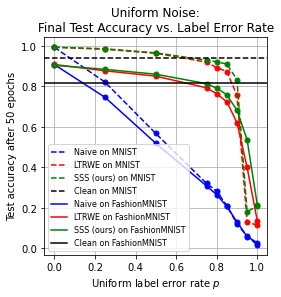

In [52]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 10})

def get_maximum_acc_traces(error_rates, results_dict):
    x      = []
    y_loss = []
    y_acc  = []
    for error_rate in error_rates:
        results = results_dict[error_rate]
        test_loss = results['test_loss']['values']
        test_accuracy = results['test_accuracy']['values']
        max_accuracy_idx = -1
        x.append(error_rate)
        y_loss.append(test_loss[max_accuracy_idx])
        y_acc.append(test_accuracy[max_accuracy_idx])
    x      = np.array(x)
    y_loss = np.array(y_loss)
    y_acc  = np.array(y_acc)
    return x, y_loss, y_acc

(fig, ax) = plt.subplots(1, 1, figsize=(4, 4))
ax.set_xlabel('Uniform label error rate $p$')
ax.set_ylabel('Test accuracy after 50 epochs')
ax.set_title('Uniform Noise:\nFinal Test Accuracy vs. Label Error Rate')

x, _, y_acc = get_maximum_acc_traces(error_rates, mnist_naive_results)
ax.plot(x, y_acc, color='blue', linestyle='--', marker='.', markersize=10, label='Naive on MNIST')

x, _, y_acc = get_maximum_acc_traces(error_rates, mnist_ltrwe_results)
ax.plot(x, y_acc, color='red', linestyle='--', marker='.', markersize=10, label='LTRWE on MNIST')

x, _, y_acc = get_maximum_acc_traces(error_rates, mnist_sss_results)
ax.plot(x, y_acc, color='green', linestyle='--', marker='.', markersize=10, label='SSS (ours) on MNIST')

_, _, y_acc = get_maximum_acc_traces([0], mnist_baseline_results)
ax.axhline(y_acc, color='black', linestyle='--', label='Clean on MNIST')

x, _, y_acc = get_maximum_acc_traces(error_rates, fmnist_naive_results)
ax.plot(x, y_acc, color='blue', linestyle='-', marker='.', markersize=10, label='Naive on FashionMNIST')

x, _, y_acc = get_maximum_acc_traces(error_rates, fmnist_ltrwe_results)
ax.plot(x, y_acc, color='red', linestyle='-', marker='.', markersize=10, label='LTRWE on FashionMNIST')

x, _, y_acc = get_maximum_acc_traces(error_rates, fmnist_sss_results)
ax.plot(x, y_acc, color='green', linestyle='-', marker='.', markersize=10, label='SSS (ours) on FashionMNIST')

_, _, y_acc = get_maximum_acc_traces([0], fmnist_baseline_results)
ax.axhline(y_acc, color='black', linestyle='-', label='Clean on FashionMNIST')

leg = ax.legend(prop={'size': 8})
for h in leg.legendHandles:
    h._legmarker.set_markersize(0)
ax.grid(True)

fig.savefig(os.path.join('..', '..', 'figures', 'uniform_performance_vs_error.pdf'))

# Plot the training curves for each error rate

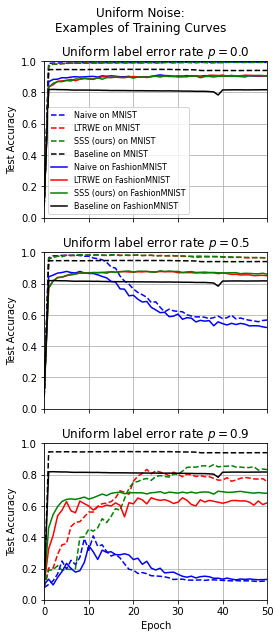

In [53]:
def get_training_curve_traces(error_rate, results_dict):
    x      = []
    y_loss = []
    y_acc  = []
    results = results_dict[error_rate]
    test_loss = results['test_loss']['values']
    test_accuracy = results['test_accuracy']['values']
    x      = np.array(results['test_loss']['epochs'])
    y_loss = np.array(test_loss)
    y_acc  = np.array(test_accuracy)
    return x, y_loss, y_acc

(fig, ax) = plt.subplots(3, 1, figsize=(4, 9), sharex=True)
ax[-1].set_xlabel('Epoch')
ax[0].set_ylabel('Test Accuracy')
ax[0].set_title('Uniform label error rate $p=0.0$')
ax[1].set_ylabel('Test Accuracy')
ax[1].set_title('Uniform label error rate $p=0.5$')
ax[2].set_ylabel('Test Accuracy')
ax[2].set_title('Uniform label error rate $p=0.9$')
ax[0].set_xlim(0, 50)
ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)
ax[2].set_ylim(0, 1)
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
fig.suptitle('Uniform Noise:\nExamples of Training Curves')

for (idx, error_rate) in enumerate([0, 0.5, 0.9]):
    x, y_loss, y_acc = get_training_curve_traces(error_rate, mnist_naive_results)
    ax[idx].plot(x, y_acc, color='blue', linestyle='--', label='Naive on MNIST')

    x, y_loss, y_acc = get_training_curve_traces(error_rate, mnist_ltrwe_results)
    ax[idx].plot(x, y_acc, color='red', linestyle='--', label='LTRWE on MNIST')

    x, y_loss, y_acc = get_training_curve_traces(error_rate, mnist_sss_results)
    ax[idx].plot(x, y_acc, color='green', linestyle='--', label='SSS (ours) on MNIST')
    
    x, y_loss, y_acc = get_training_curve_traces(0, mnist_baseline_results)
    ax[idx].plot(x, y_acc, color='black', linestyle='--', label='Baseline on MNIST')

    x, y_loss, y_acc = get_training_curve_traces(error_rate, fmnist_naive_results)
    ax[idx].plot(x, y_acc, color='blue', linestyle='-', label='Naive on FashionMNIST')

    x, y_loss, y_acc = get_training_curve_traces(error_rate, fmnist_ltrwe_results)
    ax[idx].plot(x, y_acc, color='red', linestyle='-', label='LTRWE on FashionMNIST')

    x, y_loss, y_acc = get_training_curve_traces(error_rate, fmnist_sss_results)
    ax[idx].plot(x, y_acc, color='green', linestyle='-', label='SSS (ours) on FashionMNIST')

    x, y_loss, y_acc = get_training_curve_traces(0, fmnist_baseline_results)
    ax[idx].plot(x, y_acc, color='black', linestyle='-', label='Baseline on FashionMNIST')
    
ax[0].legend(prop={'size': 8})
plt.tight_layout()

fig.savefig(os.path.join('..', '..', 'figures', 'uniform_training_curves.pdf'))

# Plot number of correct/incorrect samples used over time for each method

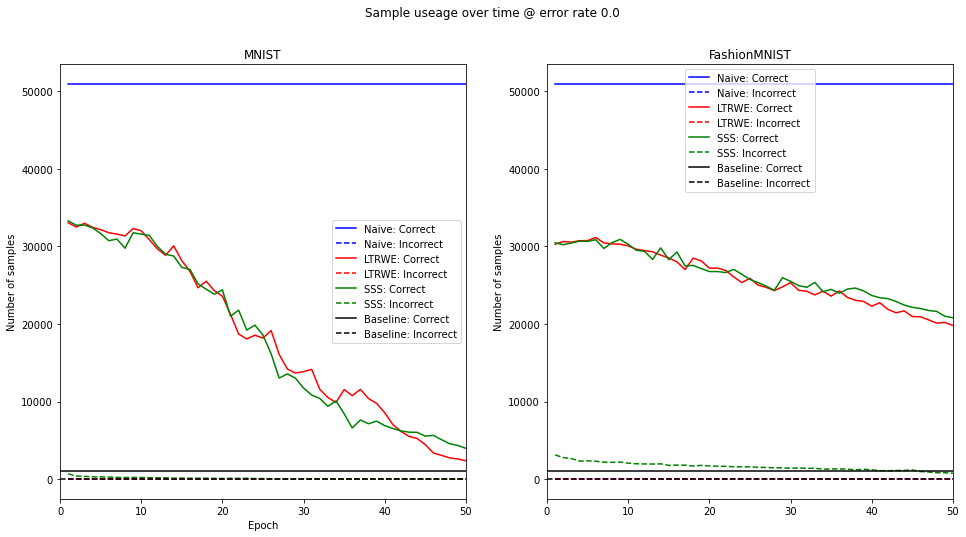

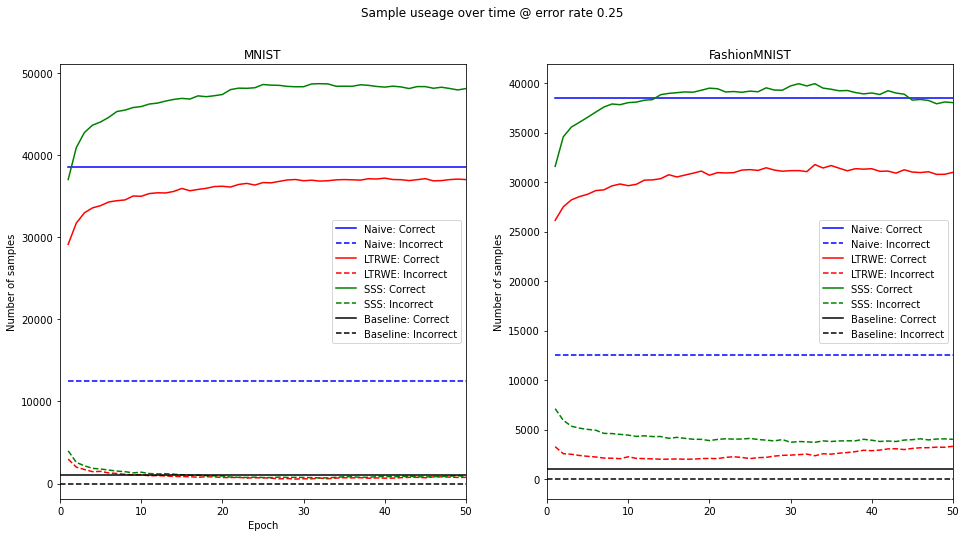

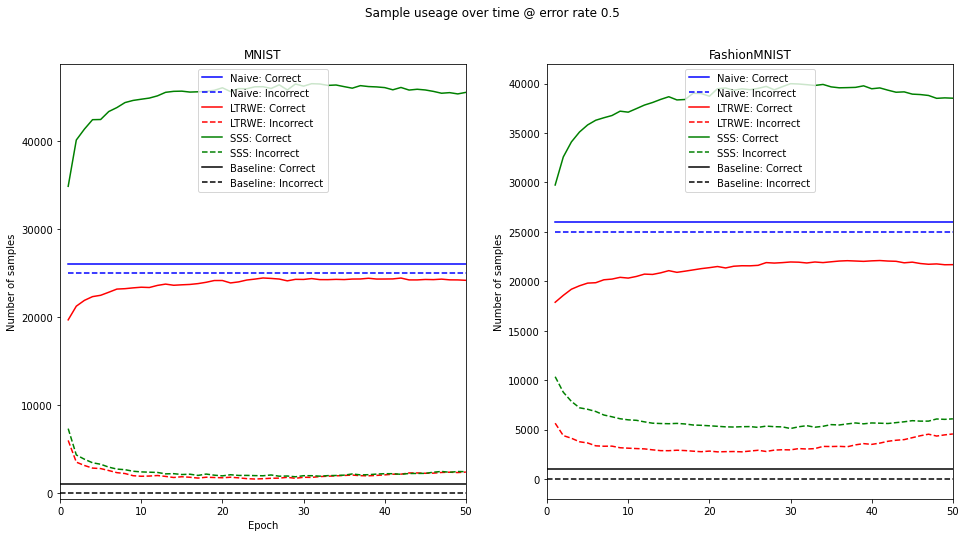

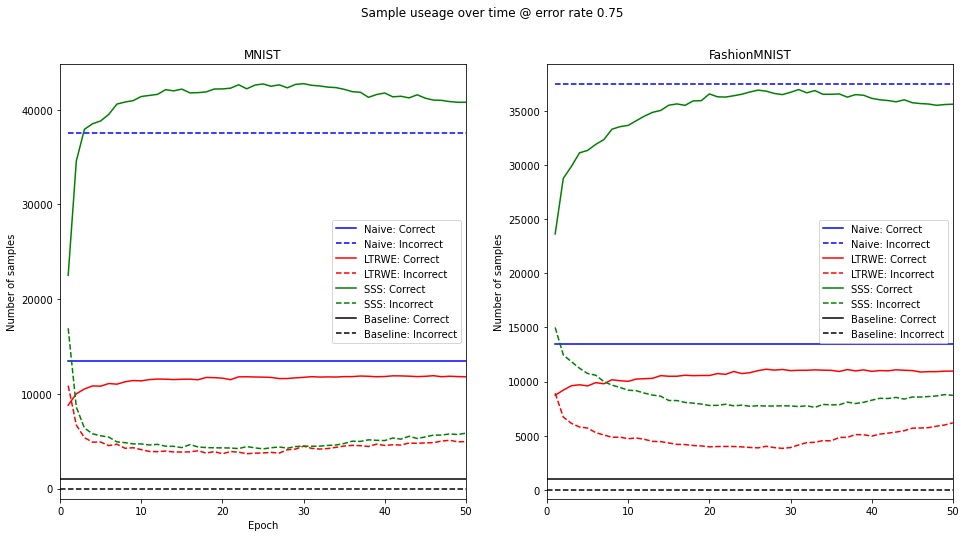

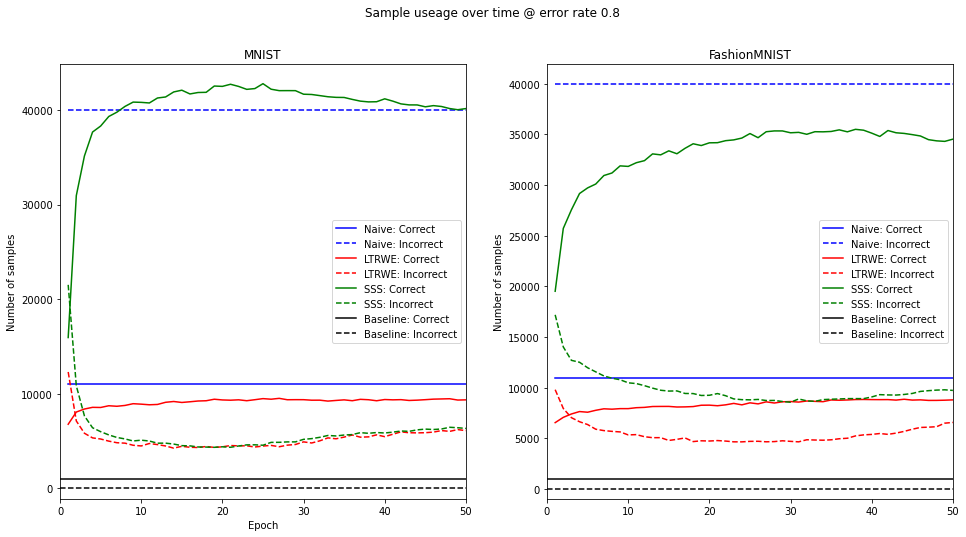

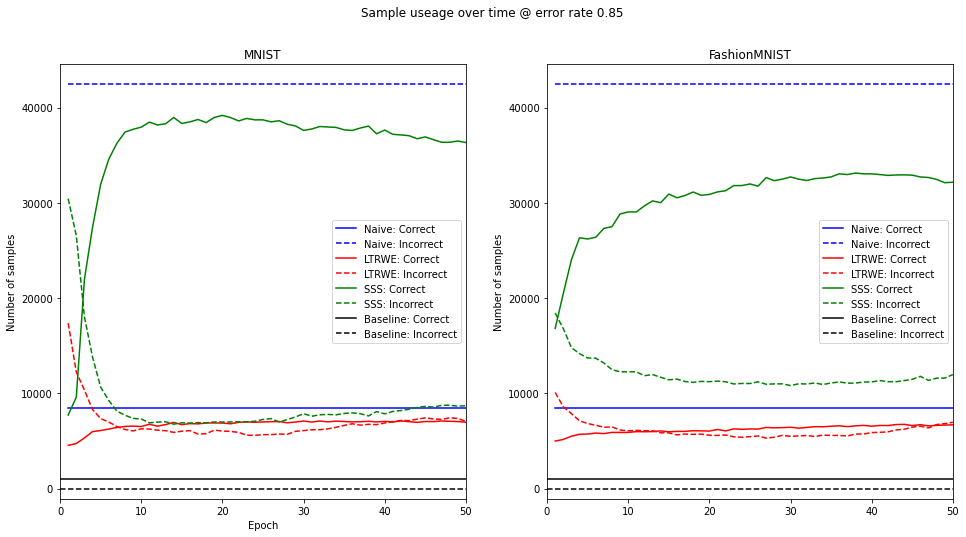

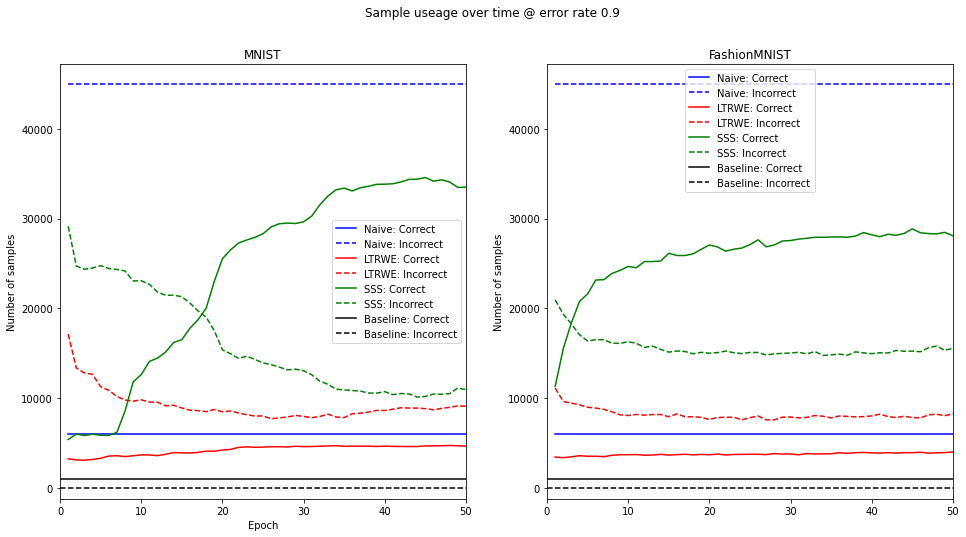

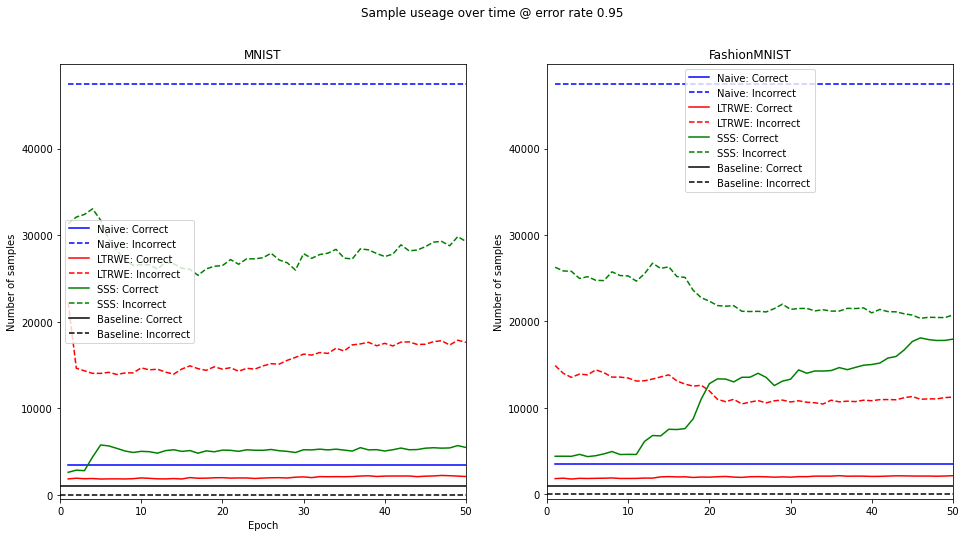

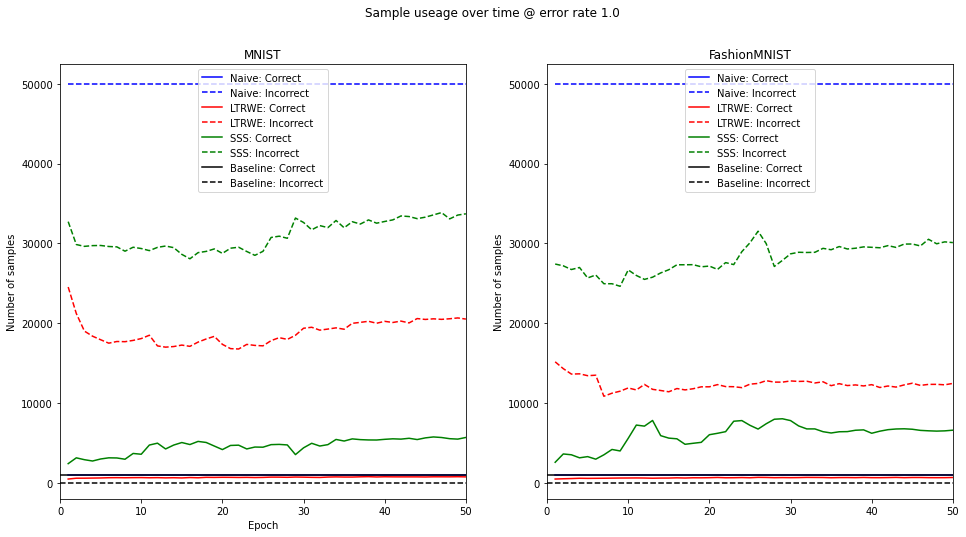

In [9]:
def get_sample_useage_traces(error_rate, results_dict):
    x      = []
    y_loss = []
    y_acc  = []
    results = results_dict[error_rate]
    train_correct_useage = results['train_correct_nonzero']['values']
    train_incorrect_useage = results['train_incorrect_nonzero']['values']
    x      = np.array(results['train_correct_nonzero']['epochs'])
    y_correct = np.array(train_correct_useage)
    y_incorrect  = np.array(train_incorrect_useage)
    return x, y_correct, y_incorrect

#[0.0, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.925, 0.95, 0.975, 1.0]

for error_rate in error_rates:
    (fig, ax) = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Number of samples')
    ax[1].set_ylabel('Number of samples')
    ax[0].set_title('MNIST')
    ax[1].set_title('FashionMNIST')
    ax[0].set_xlim(0, 50)
    ax[1].set_xlim(0, 50)
    fig.suptitle('Sample useage over time @ error rate {}'.format(error_rate))
    
    x, y_c, y_i = get_sample_useage_traces(error_rate, mnist_naive_results)
    ax[0].plot(x, y_c, color='blue', linestyle='-', label='Naive: Correct')
    ax[0].plot(x, y_i, color='blue', linestyle='--', label='Naive: Incorrect')
    
    x, y_c, y_i = get_sample_useage_traces(error_rate, mnist_ltrwe_results)
    ax[0].plot(x, y_c, color='red', linestyle='-', label='LTRWE: Correct')
    ax[0].plot(x, y_i, color='red', linestyle='--', label='LTRWE: Incorrect')
    
    x, y_c, y_i = get_sample_useage_traces(error_rate, mnist_sss_results)
    ax[0].plot(x, y_c, color='green', linestyle='-', label='SSS: Correct')
    ax[0].plot(x, y_i, color='green', linestyle='--', label='SSS: Incorrect')
    
    ax[0].axhline(1000, color='black', linestyle='-', label='Baseline: Correct')
    ax[0].axhline(0, color='black', linestyle='--', label='Baseline: Incorrect')
    
    x, y_c, y_i = get_sample_useage_traces(error_rate, fmnist_naive_results)
    ax[1].plot(x, y_c, color='blue', linestyle='-', label='Naive: Correct')
    ax[1].plot(x, y_i, color='blue', linestyle='--', label='Naive: Incorrect')
    
    x, y_c, y_i = get_sample_useage_traces(error_rate, fmnist_ltrwe_results)
    ax[1].plot(x, y_c, color='red', linestyle='-', label='LTRWE: Correct')
    ax[1].plot(x, y_i, color='red', linestyle='--', label='LTRWE: Incorrect')
    
    x, y_c, y_i = get_sample_useage_traces(error_rate, fmnist_sss_results)
    ax[1].plot(x, y_c, color='green', linestyle='-', label='SSS: Correct')
    ax[1].plot(x, y_i, color='green', linestyle='--', label='SSS: Incorrect')

    ax[1].axhline(1000, color='black', linestyle='-', label='Baseline: Correct')
    ax[1].axhline(0, color='black', linestyle='--', label='Baseline: Incorrect')
    
    ax[0].legend()
    ax[1].legend()


# Plot mean number of samples per epoch, vs. error rate

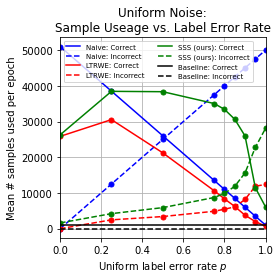

In [54]:
def get_mean_sample_useage(error_rates, results_dict):
    x      = []
    y_c = []
    y_i  = []
    for error_rate in error_rates:
        results = results_dict[error_rate]
        correct_useage = results['train_correct_nonzero']['values']
        incorrect_useage = results['train_incorrect_nonzero']['values']
        x.append(error_rate)
        y_c.append(np.mean(correct_useage))
        y_i.append(np.mean(incorrect_useage))
    x      = np.array(x)
    y_c    = np.array(y_c)
    y_i    = np.array(y_i)
    return x, y_c, y_i

(fig, ax) = plt.subplots(1, 1, figsize=(4, 4))
ax.set_xlabel('Uniform label error rate $p$')
ax.set_ylabel('Mean # samples used per epoch')
ax.set_xlim(0, 1)
ax.set_title('Uniform Noise:\nSample Useage vs. Label Error Rate')

x, y_c, y_i = get_mean_sample_useage(error_rates, fmnist_naive_results)
ax.plot(x, y_c, color='blue', linestyle='-', marker='.', markersize=10, label='Naive: Correct')
ax.plot(x, y_i, color='blue', linestyle='--', marker='.', markersize=10, label='Naive: Incorrect')

x, y_c, y_i = get_mean_sample_useage(error_rates, fmnist_ltrwe_results)
ax.plot(x, y_c, color='red', linestyle='-', marker='.', markersize=10, label='LTRWE: Correct')
ax.plot(x, y_i, color='red', linestyle='--', marker='.', markersize=10, label='LTRWE: Incorrect')

x, y_c, y_i = get_mean_sample_useage(error_rates, fmnist_sss_results)
ax.plot(x, y_c, color='green', linestyle='-', marker='.', markersize=10, label='SSS (ours): Correct')
ax.plot(x, y_i, color='green', linestyle='--', marker='.', markersize=10, label='SSS (ours): Incorrect')

ax.axhline(1000, color='black', linestyle='-', label='Baseline: Correct')
ax.axhline(0, color='black', linestyle='--', label='Baseline: Incorrect')

ax.grid(True)
leg = ax.legend(prop={'size': 7}, ncol=2)
for h in leg.legendHandles:
    h._legmarker.set_markersize(0)
plt.tight_layout()
fig.savefig(os.path.join('..', '..', 'figures', 'uniform_sample_useage.pdf'))